🧬 💵 Let's read salary data for biotech careers from [this public spreadsheet](https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk).

First, load the `googlesheets4` package.

In [4]:
library('googlesheets4')
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [32]:
gs4_deauth()

money=read_sheet("https://docs.google.com/spreadsheets/d/1G0FmJhkOME_sv66hWmhnZS5qR2KMTY7nzkxksv46bfk/edit#gid=453658888") |>
    mutate (`Years of Experience` = as.integer(`Years of Experience`)) |>
    filter(!is.na(`Years of Experience`))
money %>% head()

✔ Reading from r/biotech salary and company survey.

✔ Range Form Responses 2.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Years of Experience = as.integer(`Years of Experience`)`.
Caused by warning:
! NAs introduced by coercion”


Timestamp,What country do you work in?,Where is the closest major city or hub?,Biotech sub industry?,Company or Institution Name,Company Details - public/private/start-up/ subsidiary of,Company Detail - Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,List other relevant and recognized certifications,⋯,Compensation - Overtime Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,Compensation - Sign on Bonus Value,Compensation - Stock Options,Compensation - Retirement Benefits (free text),Compensation - Healthcare Benefits (free text),Compensation - Most recent annual yearly raise (%),[OPTIONAL] Sign on - Relocation Assistance Total Value,[Optional] Company Review
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<list>,<list>,<list>,<dbl>,<list>,<list>,<list>,<list>,<dbl>,<chr>
2023-03-29 01:16:54,USA,Boston,Pharmaceutical (including “big pharma”),Sanofi,Public,5000+,Senior Research Associate,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),9500,Not Applicable/None,15000,NULL,9% 401k match,NULL,Have not been long enough to have an annual yearly raise,NA,NA
2023-03-29 01:14:36,USA,Washington DC,Medical Devices,Senseonics,Public,50-200,Sr Scientist,PhD or Equivalent,None,⋯,N/A (no overtime/salaried),12750,Not Applicable/None,NA,RSU and Options,401k match up to 4%,PPO,0.045,NA,V positive
2023-03-29 01:09:43,United States,Seattle,Pharmaceutical (including “big pharma”),Prefer not to say,Public,1000-5000,Senior Quality Manager,Bachelors or Equivalent,ASQ,⋯,N/A (no overtime/salaried),25000,30000,NA,NULL,NULL,NULL,4,NA,NA
2023-03-29 01:02:04,USA,"Washington, DC",Pharmaceutical (including “big pharma”),Prefer not to say,Public,200-1000,Clinical Research Manager,PhD or Equivalent,None,⋯,N/A (no overtime/salaried),11500,Not Applicable/None,NA,NULL,401K 4% match,NULL,Have not been long enough to have an annual yearly raise,NA,NA
2023-03-29 00:42:48,United States of America,San Diego,Pharmaceutical (including “big pharma”),Prefer not to say,Start-up,1-50,Process Development Associate,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),10000,Not Applicable/None,8000,N/A - not public yet,N/A,Healthcare premiums are covered 100%,Have not been long enough to have an annual yearly raise,NA,NA
2023-03-29 00:41:11,USA,Bay Area,Pharmaceutical (including “big pharma”),Prefer not to say,Public,5000+,Research Scientist,PhD or Equivalent,None,⋯,N/A (no overtime/salaried),25000,Not Applicable/None,NA,NULL,NULL,NULL,Have not been long enough to have an annual yearly raise,NA,NA


📈 Make a chart that shows the relationship between `Years of Experience` and `Compensation - Annual Base Salary/Pay`.

❗️ Remember that you need to use backticks to access columns whose names have spaces:

```
`Years of Experience`
```

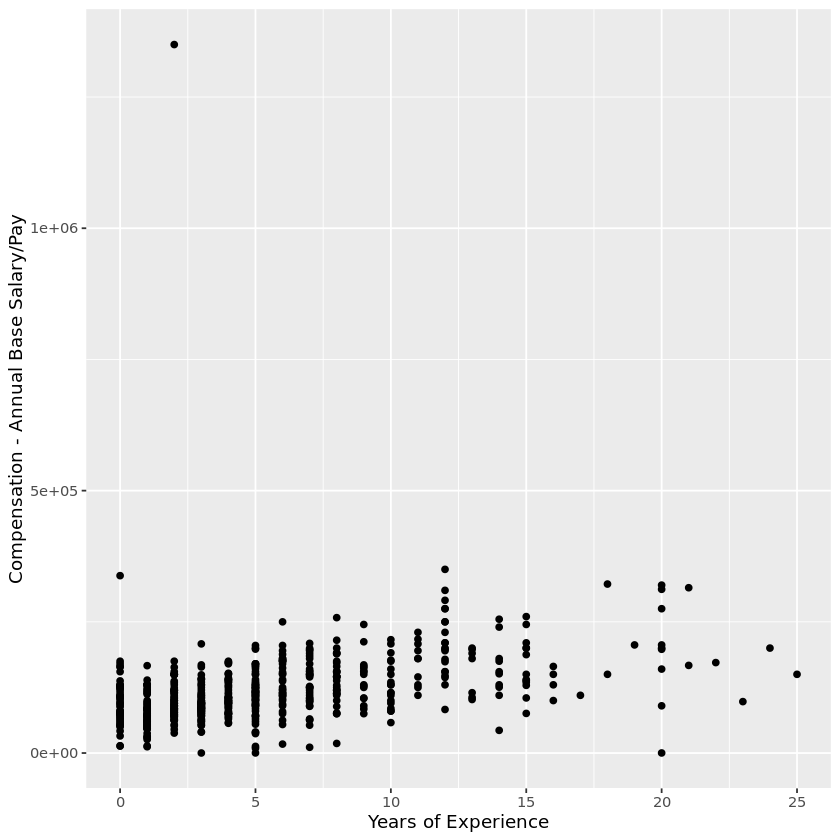

In [35]:
p = ggplot(money, aes(x = `Years of Experience`, y = `Compensation - Annual Base Salary/Pay`)) +
    geom_point()

p

📊 Count the number of respondents that belong to each `Highest achieved Formal Education` category. You can do this visually with `geom_bar` or in table form with `dplyr`...

In [38]:
money |>
    group_by(`Highest achieved Formal Education`) |>
    summarize(n=n())

Highest achieved Formal Education,n
<chr>,<int>
Associate’s Degree or Equivalent,6
Bachelors or Equivalent,244
High School or Equivalent,1
M.D./PharmD/D.D.S. or Equivalent,9
Masters or Equivalent,136
PhD or Equivalent,190


In [37]:
library(dplyr)

counts_table = money %>%
    count(`Highest achieved Formal Education`)

counts_table %>% head()


Highest achieved Formal Education,n
<chr>,<int>
Associate’s Degree or Equivalent,6
Bachelors or Equivalent,244
High School or Equivalent,1
M.D./PharmD/D.D.S. or Equivalent,9
Masters or Equivalent,136
PhD or Equivalent,190


📊 Make a histogram of `Compensation - Annual Base Salary/Pay` for respondents in the `Bachelors or Equivalent` group from the `Highest achieved Formal Education` column.,

In [44]:
bachelorsdegree_money = money |>
    filter(`Highest achieved Formal Education` == "Bachelors or Equivalent")

bachelorsdegree_money %>% head()

Timestamp,What country do you work in?,Where is the closest major city or hub?,Biotech sub industry?,Company or Institution Name,Company Details - public/private/start-up/ subsidiary of,Company Detail - Approximate Company Size,Role / Title of current position,Highest achieved Formal Education,List other relevant and recognized certifications,⋯,Compensation - Overtime Pay,Compensation - Annual Target Bonus ($),Compensation - Annual Equity,Compensation - Sign on Bonus Value,Compensation - Stock Options,Compensation - Retirement Benefits (free text),Compensation - Healthcare Benefits (free text),Compensation - Most recent annual yearly raise (%),[OPTIONAL] Sign on - Relocation Assistance Total Value,[Optional] Company Review
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<list>,<list>,<list>,<dbl>,<list>,<list>,<list>,<list>,<dbl>,<chr>
2023-03-29 01:16:54,USA,Boston,Pharmaceutical (including “big pharma”),Sanofi,Public,5000+,Senior Research Associate,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),9500,Not Applicable/None,15000,NULL,9% 401k match,NULL,Have not been long enough to have an annual yearly raise,NA,NA
2023-03-29 01:09:43,United States,Seattle,Pharmaceutical (including “big pharma”),Prefer not to say,Public,1000-5000,Senior Quality Manager,Bachelors or Equivalent,ASQ,⋯,N/A (no overtime/salaried),25000,30000,NA,NULL,NULL,NULL,4,NA,NA
2023-03-29 00:42:48,United States of America,San Diego,Pharmaceutical (including “big pharma”),Prefer not to say,Start-up,1-50,Process Development Associate,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),10000,Not Applicable/None,8000,N/A - not public yet,N/A,Healthcare premiums are covered 100%,Have not been long enough to have an annual yearly raise,NA,NA
2023-03-29 01:24:41,US,DMV,Industrial Biotech,Prefer not to say,Public,1000-5000,Senior Associate Scientist,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),0.15,0.05,0,34000,4.5% 401k match no vest period,"FSA/HSA, Good benefits. Out of pocket is 0, total care cost is $176/mo.",0.045,0,NA
2023-03-29 02:17:50,United States of America,San Diego,Software,Prefer not to say,Start-up,1-50,Bioinformatics Scientist,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),Not Applicable/None,Not Applicable/None,NA,NULL,NULL,NULL,Company/Institution does not have annual yearly raise,NA,NA
2023-03-29 02:18:28,United States,San Diego,Pharmaceutical (including “big pharma”),Prefer not to say,Public,200-1000,Research Associate I,Bachelors or Equivalent,None,⋯,N/A (no overtime/salaried),6840,5000,11000,NULL,5% 401k match,NULL,Have not been long enough to have an annual yearly raise,NA,NA


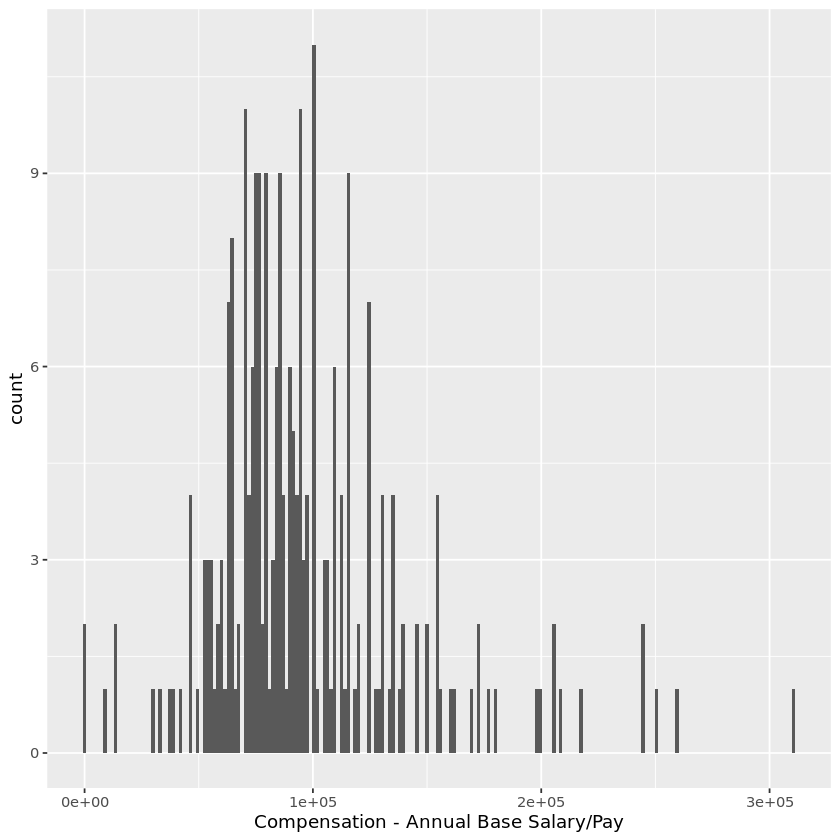

In [55]:
p = ggplot(bachelorsdegree_money, aes(x = `Compensation - Annual Base Salary/Pay`)) +
    geom_histogram(binwidth = 1500)

p